In [1]:
#импортируем необходимые библиотеки для обработки данных
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
#загружаем имеющиеся данные
excel_reader=pd.ExcelFile('/content/drive/MyDrive/data_glaucoma.xls')

В таблице с данными 4 листа. Выделим их для удобства работы в отдельные таблицы.

In [3]:
print(excel_reader.sheet_names)

['Здоровые', ' I стадия ПОУГ', ' II стадия ПОУГ', ' III стадия ПОУГ']


In [4]:
data_healthy=excel_reader.parse('Здоровые')

In [5]:
data_healthy.head(11)

,Unnamed: 0,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,...,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z\nбаз.\n(отн.)),Z\nбаз.\n(мОм),УОК\n(уд.объем)\nмкл
0,уланкина,25,0,10,12,0.0162,9.7,9.4,9.3,11.3,...,1.75,0.0162,56.300000,46.03000,49.65,0.27,0.25,979.0,39.16,1.157570
1,степанова,26,0,12,15,0.0162,18.5,19.9,12.8,11.6,...,1.85,0.0162,50.960000,44.21000,NaN,NaN,NaN,NaN,NaN,NaN
2,кудасов,32,0,10,12,0.0162,14.3,12.0,8.3,9.2,...,NaN,NaN,53.580000,47.40000,102.33,0.13,0.14,1060.0,42.40,2.203474
3,NaN,32,0,10,12,0.0162,17.6,13.9,7.6,7.6,...,NaN,NaN,56.297266,45.46207,58.43,0.20,0.21,1063.0,42.52,1.254623
4,гладих,68,0,10,14,0.0138,20.1,17.2,8.8,7.9,...,1.75,0.0138,48.680000,45.88000,20.97,0.13,0.14,725.0,29.00,0.660193
5,мыздриков,59,0,12,14,0.0161,8.5,8.1,9.1,11.4,...,1.85,0.0161,53.560000,48.42000,35.50,0.52,0.42,917.0,36.68,0.883629
6,Савинова,66,0,15,23,0.0076,NaN,NaN,NaN,NaN,...,1.30,0.0076,48.710000,NaN,49.88,0.29,0.30,910.0,36.40,1.251111
7,NaN,66,0,12,16,0.0140,NaN,NaN,NaN,NaN,...,1.70,0.0140,NaN,NaN,53.23,0.32,0.33,822.0,32.88,1.478071
8,Мациева,68,0,18,28,0.0052,20.4,20.0,11.3,9.9,...,1.10,0.0052,51.320000,43.70000,NaN,NaN,NaN,NaN,NaN,NaN
9,Булат,51,0,12,19,0.0031,17.8,16.5,10.0,9.6,...,0.60,0.0031,NaN,NaN,183.50,0.33,0.40,1210.0,48.40,3.461477


In [6]:
data_1_stage=excel_reader.parse(' I стадия ПОУГ')

In [7]:
data_1_stage

,Unnamed: 0,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,...,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z\nбаз.\n(отн.)),Z\nбаз.\n(мОм),УОК\n(уд.объем)\nмкл
0,горнева,84.0,1.0,13.0,27.0,0.0007,16.1,14.7,9.5,9.6,...,0.45,0.0007,NaN,NaN,30.27,0.27,0.31,NaN,NaN,NaN
1,фокина,64.0,1.0,20.0,30.0,0.0053,20.0,20.0,11.0,10.0,...,0.55,0.0053,46.730000,34.530000,44.00,0.11,0.20,982.0,39.28,1.022709
2,петрова,56.0,1.0,18.0,21.0,0.0148,23.7,23.1,11.7,9.3,...,2.00,0.0148,54.630000,42.690000,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,56.0,1.0,21.0,18.0,0.0268,26.8,25.6,11.8,8.5,...,2.10,0.0268,53.750000,41.320000,NaN,NaN,NaN,NaN,NaN,NaN
4,ефременкова,65.0,1.0,7.0,9.0,0.0167,17.7,14.4,8.0,8.0,...,1.95,0.0167,50.500000,47.950000,76.00,0.05,0.09,1077.0,43.08,1.610678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Зоммер,58.0,1.0,10.0,8.0,0.0243,14.2,13.2,9.5,10.2,...,NaN,NaN,NaN,NaN,12.89,0.05,0.14,930.0,37.20,0.316359
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Королева Светлана,81.0,1.0,10.0,14.0,0.0140,13.2,11.4,8.6,9.7,...,NaN,NaN,NaN,NaN,38.04,0.16,0.28,1027.0,41.08,0.845436
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_2_stage=excel_reader.parse(' II стадия ПОУГ')

In [9]:
data_2_stage

,Unnamed: 0,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,...,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z\nбаз.\n(отн.)),Z\nбаз.\n(мОм),УОК\n(уд.объем)\nмкл
0,горнева,84,2,13,17,0.0132,16.2,14.1,8.8,9.0,...,1.65,0.0132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,64,2,19,24,0.0127,15.7,15.7,10.0,10.0,...,1.65,0.0127,44.11,32.11,NaN,NaN,NaN,NaN,NaN,NaN
2,близнюк,70,2,11,11,0.0214,19.8,18.0,9.9,8.9,...,2.40,0.0343,51.47,47.28,43.37,0.11,0.26,960.0,38.40,1.031167
3,NaN,68,2,11,12,0.0190,17.1,14.0,8.1,8.2,...,0.70,0.0190,50.96,41.77,33.20,0.71,0.75,925.0,37.00,0.819232
4,митина,80,2,17,21,0.0146,23.5,21.0,9.9,7.9,...,1.75,0.0146,44.14,29.78,27.39,0.16,0.19,1080.0,43.20,0.578867
5,якубова,71,2,15,20,0.0133,26.5,25.7,12.1,8.8,...,1.70,0.0133,47.36,36.07,NaN,NaN,NaN,NaN,NaN,NaN
6,емельянова,77,2,16,17,0.0199,20.2,18.0,9.6,8.6,...,2.00,0.0199,NaN,NaN,29.34,0.26,0.28,911.0,36.44,0.735110
7,Мациева,68,2,17,12,0.0325,22.6,19.4,9.0,7.4,...,2.30,0.0325,NaN,NaN,44.28,0.08,0.09,878.0,35.12,1.151129
8,Попова,80,2,14,14,0.0204,24.3,19.9,8.1,6.1,...,NaN,0.0204,49.31,NaN,11.36,0.12,0.27,766.0,30.64,0.338501
9,NaN,72,2,18,25,0.0092,20.7,19.6,10.7,9.3,...,1.45,0.0092,NaN,NaN,58.26,0.18,0.23,947.0,37.88,1.404207


In [10]:
data_3_stage=excel_reader.parse(' III стадия ПОУГ')

In [11]:
data_3_stage

,Unnamed: 0,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,...,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z\nбаз.\n(отн.)),Z\nбаз.\n(мОм),УОК\n(уд.объем)\nмкл
0,клычникова,68,3,13,7,0.0365,24.9,19.5,7.3,5.3,...,2.40,0.0365,49.90,43.40,NaN,NaN,NaN,NaN,NaN,NaN
1,кадушкин,68,3,15,11,0.0306,20.7,16.5,8.0,7.1,...,3.55,0.0306,49.31,39.83,15.10,0.04,0.08,917.0,36.68,0.375853
2,якубова,71,3,22,21,0.0227,26.0,23.8,10.6,7.7,...,2.20,0.0227,45.52,43.11,25.43,0.27,0.26,811.0,32.44,0.715709
3,певзнер,74,3,22,23,0.0205,20.9,18.9,9.9,8.6,...,1.95,0.0205,42.12,26.86,15.48,0.11,0.13,822.0,32.88,0.429843
4,Хохлова,64,3,14,14,0.0201,19.3,18.3,10.5,9.6,...,NaN,NaN,NaN,NaN,16.72,0.07,0.09,888.0,35.52,0.429768
5,NaN,64,3,13,10,0.0315,19.6,18.6,10.6,9.5,...,NaN,NaN,NaN,NaN,38.82,0.08,0.09,872.0,34.88,1.016131
6,Соловьева Е.,72,3,16,12,0.0306,20.0,18.0,8.7,7.6,...,NaN,NaN,NaN,NaN,49.61,0.09,0.14,877.0,35.08,1.291161
7,Зайченко,76,3,17,16,0.0246,23.1,17.1,6.5,5.1,...,NaN,NaN,NaN,NaN,57.32,0.75,0.66,410.0,16.40,3.191046
8,Вакалова,80,3,16,11,0.0347,21.0,17.8,8.7,7.6,...,NaN,NaN,28.82,38.87,26.61,0.15,0.16,483.0,19.32,1.257502
9,Колесова,67,3,18,17,0.0227,19.0,20.5,8.5,7.7,...,2.20,0.0227,42.70,40.10,25.43,0.27,0.26,811.0,32.44,0.715709


# Задача 0: Техническая предобработка данных


Добавим название первого столбца

In [12]:
data_healthy=data_healthy.rename(columns={'Unnamed: 0':'Фамилия'})
data_1_stage=data_1_stage.rename(columns={'Unnamed: 0':'Фамилия'})
data_2_stage=data_2_stage.rename(columns={'Unnamed: 0':'Фамилия'})
data_3_stage=data_3_stage.rename(columns={'Unnamed: 0':'Фамилия'})

Уберем перенос на новую строку в названиях столбцов

In [13]:
data_healthy=data_healthy.rename(columns={'Z\nбаз.\n(отн.))':'Z баз.(отн.))'})
data_1_stage=data_1_stage.rename(columns={'Z\nбаз.\n(отн.))':'Z баз.(отн.))'})
data_2_stage=data_2_stage.rename(columns={'Z\nбаз.\n(отн.))':'Z баз.(отн.))'})
data_3_stage=data_3_stage.rename(columns={'Z\nбаз.\n(отн.))':'Z баз.(отн.))'})

In [14]:
data_healthy=data_healthy.rename(columns={'Z\nбаз.\n(мОм)':'Z баз.(мОм)'})
data_1_stage=data_1_stage.rename(columns={'Z\nбаз.\n(мОм)':'Z баз.(мОм)'})
data_2_stage=data_2_stage.rename(columns={'Z\nбаз.\n(мОм)':'Z баз.(мОм)'})
data_3_stage=data_3_stage.rename(columns={'Z\nбаз.\n(мОм)':'Z баз.(мОм)'})

In [15]:
data_healthy=data_healthy.rename(columns={'УОК\n(уд.объем)\nмкл':'УОК (уд.объем) мкл'})
data_1_stage=data_1_stage.rename(columns={'УОК\n(уд.объем)\nмкл':'УОК (уд.объем) мкл'})
data_2_stage=data_2_stage.rename(columns={'УОК\n(уд.объем)\nмкл':'УОК (уд.объем) мкл'})
data_3_stage=data_3_stage.rename(columns={'УОК\n(уд.объем)\nмкл':'УОК (уд.объем) мкл'})

Заполним признак стадии в листе таблицы для 1й стадии

In [16]:
data_1_stage['стадия']=1

In [17]:
data_healthy

,Фамилия,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,...,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z баз.(отн.)),Z баз.(мОм),УОК (уд.объем) мкл
0,уланкина,25,0,10,12,0.0162,9.7,9.4,9.3,11.3,...,1.75,0.0162,56.300000,46.03000,49.65,0.27,0.25,979.0,39.16,1.157570
1,степанова,26,0,12,15,0.0162,18.5,19.9,12.8,11.6,...,1.85,0.0162,50.960000,44.21000,NaN,NaN,NaN,NaN,NaN,NaN
2,кудасов,32,0,10,12,0.0162,14.3,12.0,8.3,9.2,...,NaN,NaN,53.580000,47.40000,102.33,0.13,0.14,1060.0,42.40,2.203474
3,NaN,32,0,10,12,0.0162,17.6,13.9,7.6,7.6,...,NaN,NaN,56.297266,45.46207,58.43,0.20,0.21,1063.0,42.52,1.254623
4,гладих,68,0,10,14,0.0138,20.1,17.2,8.8,7.9,...,1.75,0.0138,48.680000,45.88000,20.97,0.13,0.14,725.0,29.00,0.660193
5,мыздриков,59,0,12,14,0.0161,8.5,8.1,9.1,11.4,...,1.85,0.0161,53.560000,48.42000,35.50,0.52,0.42,917.0,36.68,0.883629
6,Савинова,66,0,15,23,0.0076,NaN,NaN,NaN,NaN,...,1.30,0.0076,48.710000,NaN,49.88,0.29,0.30,910.0,36.40,1.251111
7,NaN,66,0,12,16,0.0140,NaN,NaN,NaN,NaN,...,1.70,0.0140,NaN,NaN,53.23,0.32,0.33,822.0,32.88,1.478071
8,Мациева,68,0,18,28,0.0052,20.4,20.0,11.3,9.9,...,1.10,0.0052,51.320000,43.70000,NaN,NaN,NaN,NaN,NaN,NaN
9,Булат,51,0,12,19,0.0031,17.8,16.5,10.0,9.6,...,0.60,0.0031,NaN,NaN,183.50,0.33,0.40,1210.0,48.40,3.461477


# Задача 1. Работа с пропущенными значениями

1. Проанализировать данные.

  Пропущенные значения дополнить тем или иным способом.

  Проанализировать, меняется ли взаимосвязь дополненных показателей с другими показателями.



---

Рассмотрим описательную статистику с пропущенными значениями

In [18]:
describe_data_healthy=data_healthy.describe()
describe_data_healthy

,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,ЦТР,...,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z баз.(отн.)),Z баз.(мОм),УОК (уд.объем) мкл
count,11.000000,11.0,11.000000,11.000000,11.000000,9.000000,9.000000,9.000000,9.000000,11.000000,...,9.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,49.454545,0.0,12.090909,16.727273,0.011409,16.100000,14.733333,9.566667,9.677778,542.181818,...,1.366667,0.010344,52.425908,45.871724,69.186250,0.273750,0.27375,960.750000,38.430000,1.543769
std,17.574775,0.0,2.467977,5.120369,0.005990,4.343961,4.257347,1.598437,1.508955,25.964661,...,0.555653,0.006151,3.019598,1.658312,51.755479,0.127048,0.10796,152.166967,6.086679,0.898572
min,25.000000,0.0,10.000000,12.000000,0.000900,8.500000,8.100000,7.600000,7.600000,507.000000,...,0.400000,0.000900,48.680000,43.700000,20.970000,0.130000,0.14000,725.000000,29.000000,0.660193
25%,32.000000,0.0,10.000000,13.000000,0.006400,14.300000,12.000000,8.800000,8.600000,526.000000,...,1.100000,0.005200,50.397500,44.836035,46.112500,0.182500,0.19250,888.000000,35.520000,1.089085
50%,51.000000,0.0,12.000000,15.000000,0.014000,17.800000,15.600000,9.100000,9.600000,537.000000,...,1.700000,0.013800,52.440000,45.880000,51.555000,0.280000,0.27500,948.000000,37.920000,1.252867
75%,66.000000,0.0,12.000000,19.000000,0.016200,18.500000,17.200000,10.000000,11.300000,552.000000,...,1.750000,0.016100,54.259317,46.715000,69.405000,0.322500,0.34750,1060.750000,42.430000,1.659422
max,68.000000,0.0,18.000000,28.000000,0.016200,20.400000,20.000000,12.800000,11.600000,590.000000,...,1.850000,0.016200,56.300000,48.420000,183.500000,0.520000,0.42000,1210.000000,48.400000,3.461477


In [19]:
describe_data_1_stage=data_1_stage.describe()
describe_data_1_stage

,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,ЦТР,...,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z баз.(отн.)),Z баз.(мОм),УОК (уд.объем) мкл
count,18.000000,70.0,18.000000,18.000000,18.000000,17.000000,17.000000,17.000000,17.000000,14.000000,...,14.000000,14.000000,14.000000,13.000000,15.000000,16.000000,16.000000,14.000000,14.000000,14.000000
mean,67.333333,1.0,13.166667,17.333333,0.013322,18.170588,16.752941,9.917647,9.352941,548.428571,...,1.557143,0.013021,50.348580,42.024374,49.415333,0.214375,0.250625,930.357143,37.214286,1.388503
std,8.000000,0.0,4.062019,6.106891,0.007714,4.219710,4.177936,1.382134,1.244547,25.046769,...,0.578412,0.007672,3.411843,5.237501,19.713056,0.157140,0.141160,196.804709,7.872188,0.991401
min,56.000000,1.0,7.000000,8.000000,0.000700,12.200000,11.400000,7.500000,7.100000,503.000000,...,0.450000,0.000700,43.230000,34.530000,12.890000,0.040000,0.070000,351.000000,14.040000,0.316359
25%,61.750000,1.0,10.000000,12.500000,0.005825,15.200000,13.500000,9.300000,8.500000,537.000000,...,1.112500,0.005825,49.687500,35.930000,35.335000,0.107500,0.147500,883.500000,35.340000,0.952784
50%,65.500000,1.0,13.000000,17.500000,0.014750,17.700000,14.900000,9.700000,9.300000,557.000000,...,1.825000,0.014750,50.775000,42.690000,50.000000,0.195000,0.255000,956.000000,38.240000,1.175543
75%,72.000000,1.0,15.000000,20.750000,0.016700,21.200000,20.000000,11.300000,10.000000,565.750000,...,1.987500,0.016700,51.922283,46.568926,66.870000,0.270000,0.312500,1051.750000,42.070000,1.601012
max,84.000000,1.0,21.000000,30.000000,0.026800,26.800000,25.600000,11.800000,12.300000,577.000000,...,2.100000,0.026800,55.300000,48.600000,76.000000,0.620000,0.580000,1193.000000,47.720000,4.501272


In [20]:
describe_data_2_stage=data_2_stage.describe()
describe_data_2_stage

,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,ЦТР,...,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z баз.(отн.)),Z баз.(мОм),УОК (уд.объем) мкл
count,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,9.000000,10.000000,7.000000,6.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,75.400000,2.0,14.466667,16.200000,0.018273,19.640000,17.620000,9.553333,8.653333,540.666667,...,1.733333,0.018910,45.355714,37.33000,42.420833,0.289167,0.332500,820.416667,32.816667,1.369332
std,6.150494,0.0,2.531704,4.554433,0.005800,3.398487,3.298961,1.120502,1.037075,25.794979,...,0.500000,0.008434,7.337049,6.39819,20.105997,0.187445,0.174987,186.396673,7.455867,1.100413
min,64.000000,2.0,11.000000,11.000000,0.009200,15.400000,13.000000,8.100000,6.100000,499.000000,...,0.700000,0.009200,30.140000,29.78000,11.360000,0.080000,0.090000,474.000000,18.960000,0.338501
25%,70.500000,2.0,12.500000,12.000000,0.013250,16.650000,15.350000,8.600000,8.050000,527.500000,...,1.650000,0.013225,44.125000,33.10000,28.852500,0.150000,0.237500,759.000000,30.360000,0.717943
50%,77.000000,2.0,14.000000,16.000000,0.019300,19.700000,18.000000,9.700000,8.900000,535.000000,...,1.700000,0.016800,47.360000,36.52000,38.285000,0.260000,0.275000,894.000000,35.760000,1.017857
75%,80.000000,2.0,16.500000,18.500000,0.020900,21.650000,19.500000,10.100000,9.350000,553.000000,...,2.000000,0.020275,50.135000,40.57000,55.927500,0.367500,0.405000,930.500000,37.220000,1.457654
max,84.000000,2.0,19.000000,25.000000,0.032500,26.500000,25.700000,12.100000,10.000000,599.000000,...,2.400000,0.034300,51.470000,47.28000,85.230000,0.710000,0.750000,1080.000000,43.200000,4.104166


In [21]:
describe_data_3_stage=data_3_stage.describe()
describe_data_3_stage

,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,ЦТР,...,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z баз.(отн.)),Z баз.(мОм),УОК (уд.объем) мкл
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,...,5.000000,5.000000,6.000000,6.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,70.400000,3.0,16.600000,14.200000,0.027450,21.450000,18.900000,8.930000,7.580000,532.444444,...,2.460000,0.026600,43.061667,38.695000,30.057778,0.203333,0.207778,765.666667,30.626667,1.046969
std,5.211099,0.0,3.272783,5.050853,0.006021,2.416264,2.065591,1.441488,1.506136,21.697414,...,0.629881,0.006739,7.690130,6.082587,15.293616,0.221303,0.182673,185.489892,7.419596,0.875615
min,64.000000,3.0,13.000000,7.000000,0.020100,19.000000,16.500000,6.500000,5.100000,498.000000,...,1.950000,0.020500,28.820000,26.860000,15.100000,0.040000,0.080000,410.000000,16.400000,0.375853
25%,67.250000,3.0,14.250000,11.000000,0.022700,19.700000,17.850000,8.125000,7.225000,523.000000,...,2.200000,0.022700,42.265000,39.110000,16.720000,0.080000,0.090000,811.000000,32.440000,0.429843
50%,69.500000,3.0,16.000000,13.000000,0.027600,20.800000,18.450000,8.700000,7.650000,527.000000,...,2.200000,0.022700,44.110000,39.965000,25.430000,0.110000,0.140000,822.000000,32.880000,0.715709
75%,73.500000,3.0,17.750000,16.750000,0.031275,22.575000,19.350000,10.350000,8.375000,554.000000,...,2.400000,0.030600,48.362500,42.357500,38.820000,0.270000,0.260000,877.000000,35.080000,1.257502
max,80.000000,3.0,22.000000,23.000000,0.036500,26.000000,23.800000,10.600000,9.600000,560.000000,...,3.550000,0.036500,49.900000,43.400000,57.320000,0.750000,0.660000,917.000000,36.680000,3.191046


## ПРОАНАЛИЗИРОВАТЬ ПОЛУЧЕННЫЕ ОПИСАНИЯ

---



анализ

## Работа с пропущенными значениями в таблице со **здоровыми** пациентами

In [22]:
#посмотрим сколько пропущенных значений в данных
data_healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Фамилия                                          8 non-null      object 
 1   возраст                                          11 non-null     int64  
 2   стадия                                           11 non-null     int64  
 3   величина внутриглазного давления                 11 non-null     int64  
 4   ВГД, корригированного на коэффициент ригидности  11 non-null     int64  
 5   Коэфф ригидности склеральн капсулы глаза         11 non-null     float64
 6   Роговично-компенсированное ВГД                   9 non-null      float64
 7   ВГД по Гольдману                                 9 non-null      float64
 8   Фактор резистентности роговицы                   9 non-null      float64
 9   КГ                                

Всего в исходных данных 11 строк.
Посмотрим сколько пропущенных значений в каждой колонке

In [23]:
data_healthy.isnull().sum()

Фамилия                                            3
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     2
ВГД по Гольдману                                   2
Фактор резистентности роговицы                     2
КГ                                                 2
ЦТР                                                0
РП                                                 0
ГлРП                                               0
gamma Ш                                            2
Efrid                                              2
SVL                                                3
DVL                                                4
РИ (рео.индекс) мОм                                3
ПМН (макс.нап)                                

Можем также оценить процент пропущенных значений

In [24]:
(data_healthy.isna().sum() / len(data_healthy)).round(4) * 100

Фамилия                                            27.27
возраст                                             0.00
стадия                                              0.00
величина внутриглазного давления                    0.00
ВГД, корригированного на коэффициент ригидности     0.00
Коэфф ригидности склеральн капсулы глаза            0.00
Роговично-компенсированное ВГД                     18.18
ВГД по Гольдману                                   18.18
Фактор резистентности роговицы                     18.18
КГ                                                 18.18
ЦТР                                                 0.00
РП                                                  0.00
ГлРП                                                0.00
gamma Ш                                            18.18
Efrid                                              18.18
SVL                                                27.27
DVL                                                36.36
РИ (рео.индекс) мОм            

**Вывод**: пропуски есть по 15 признакам из 23, что составляет более половины, процент пропущенных данных в основном не превышает 30%, кроме признака DVL(36.36%). На основе этого становится понятно, что удалять данные с пропущенными значениями - неподходящий способ в данной ситуации.

---



### Рассмотрим характер пропусков в данных

In [25]:
# импортируем библиотеку missingno с псевдонимом msno для визуализации пропусков данных
import missingno as msno

In [26]:
#настраиваем стиль графиков
sns.set()

<Axes: >

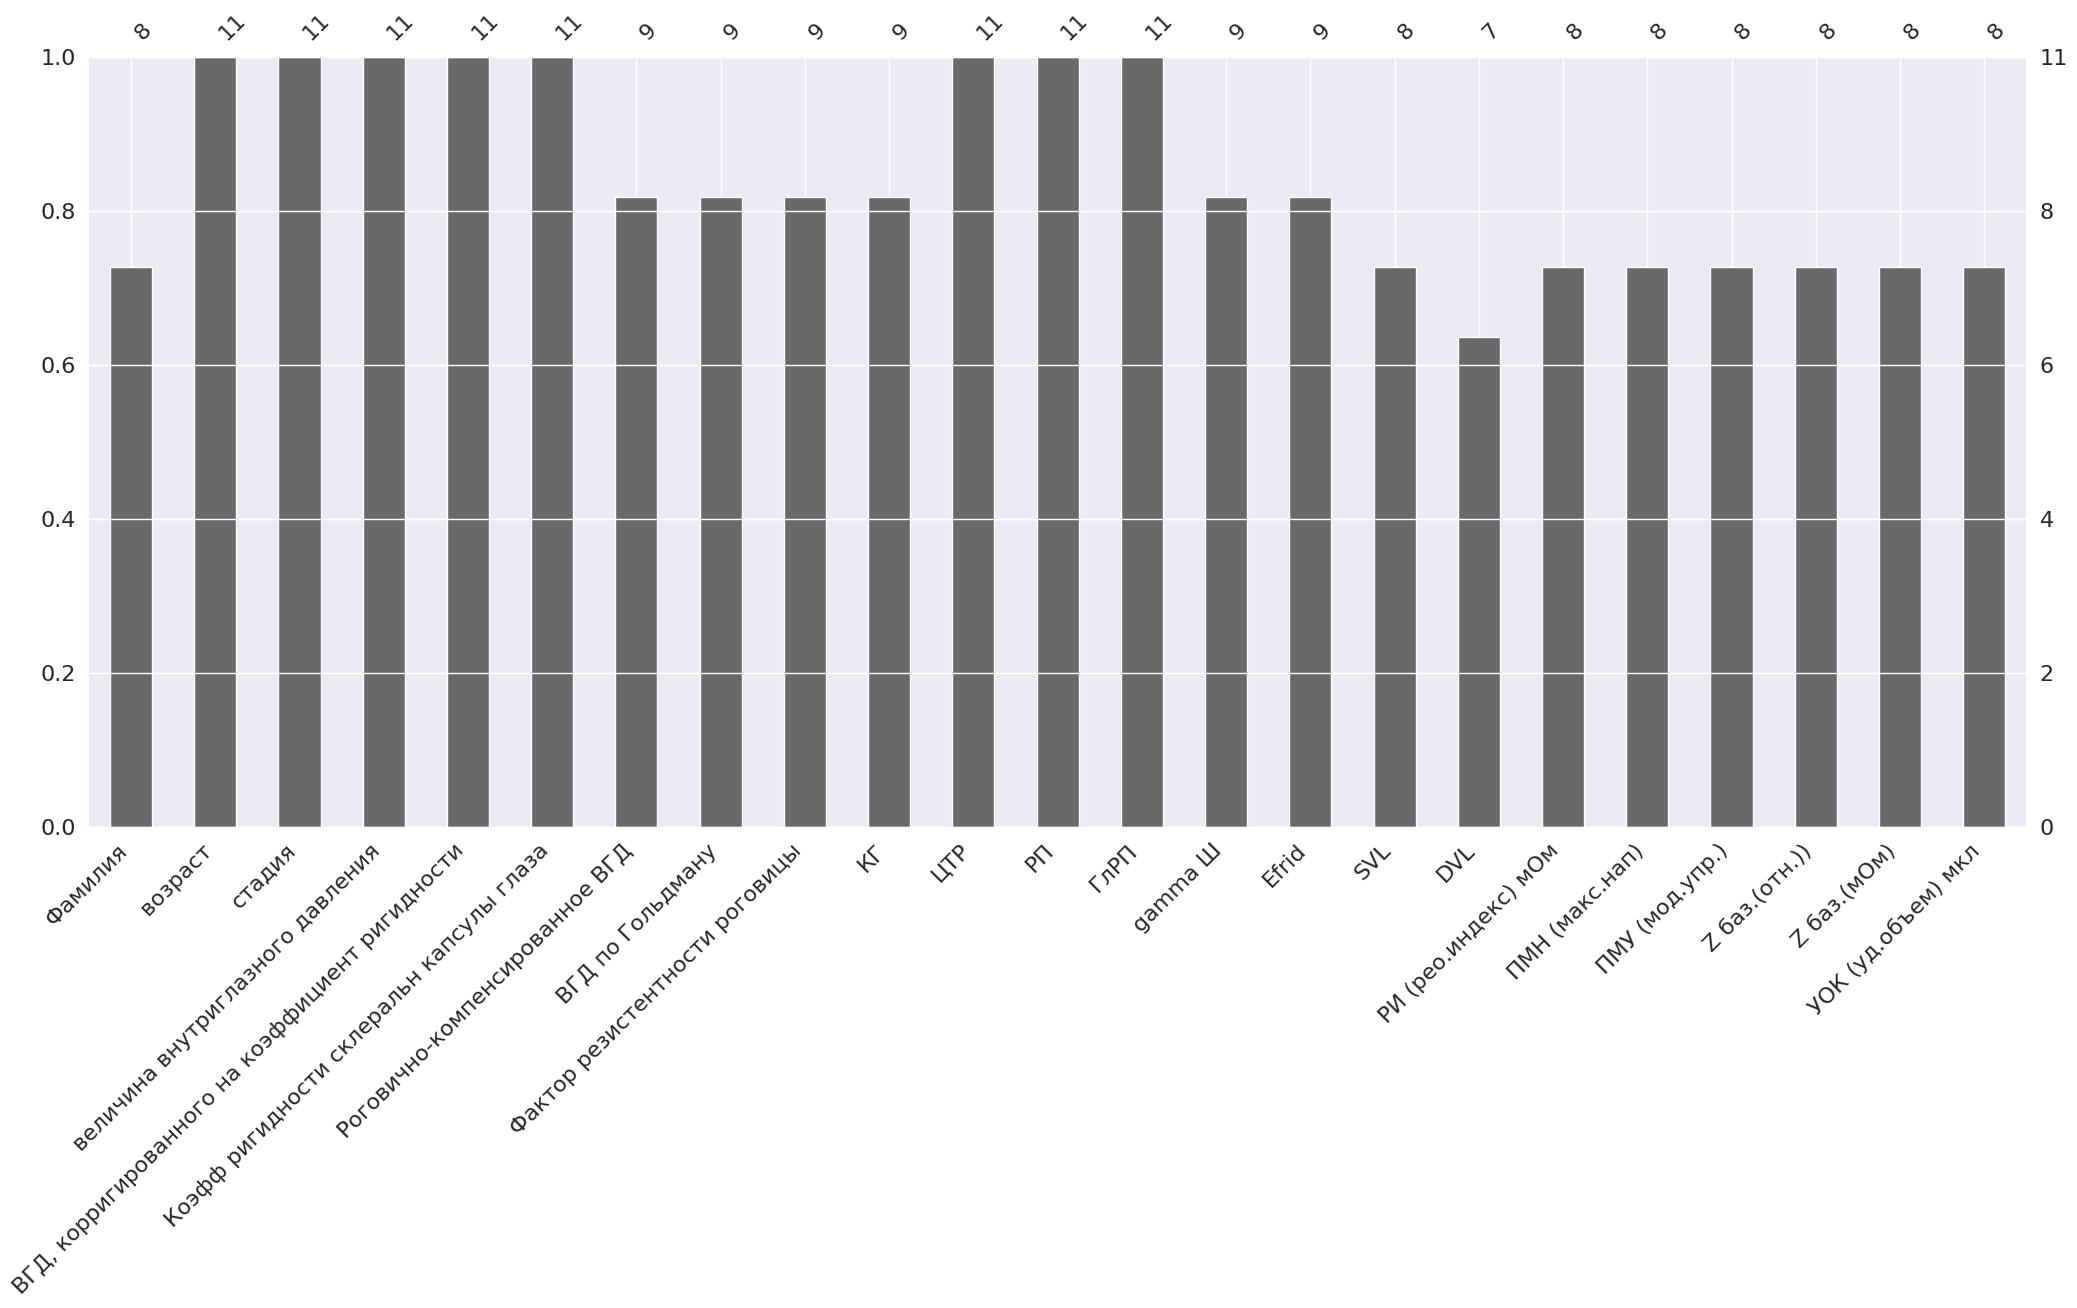

In [27]:
msno.bar(data_healthy)

На этом графике мы видим процент (слева) и абсолютное количество (справа и сверху) заполненных значений.

При этом столбчатая диаграмма не дает информации о том, где именно больше всего пропущенных значений(есть ли в пропусках какая-то закономерность или нет).

Для наглядности расположения пропусков построим **матрицу пропущенных значений.**

<Axes: >

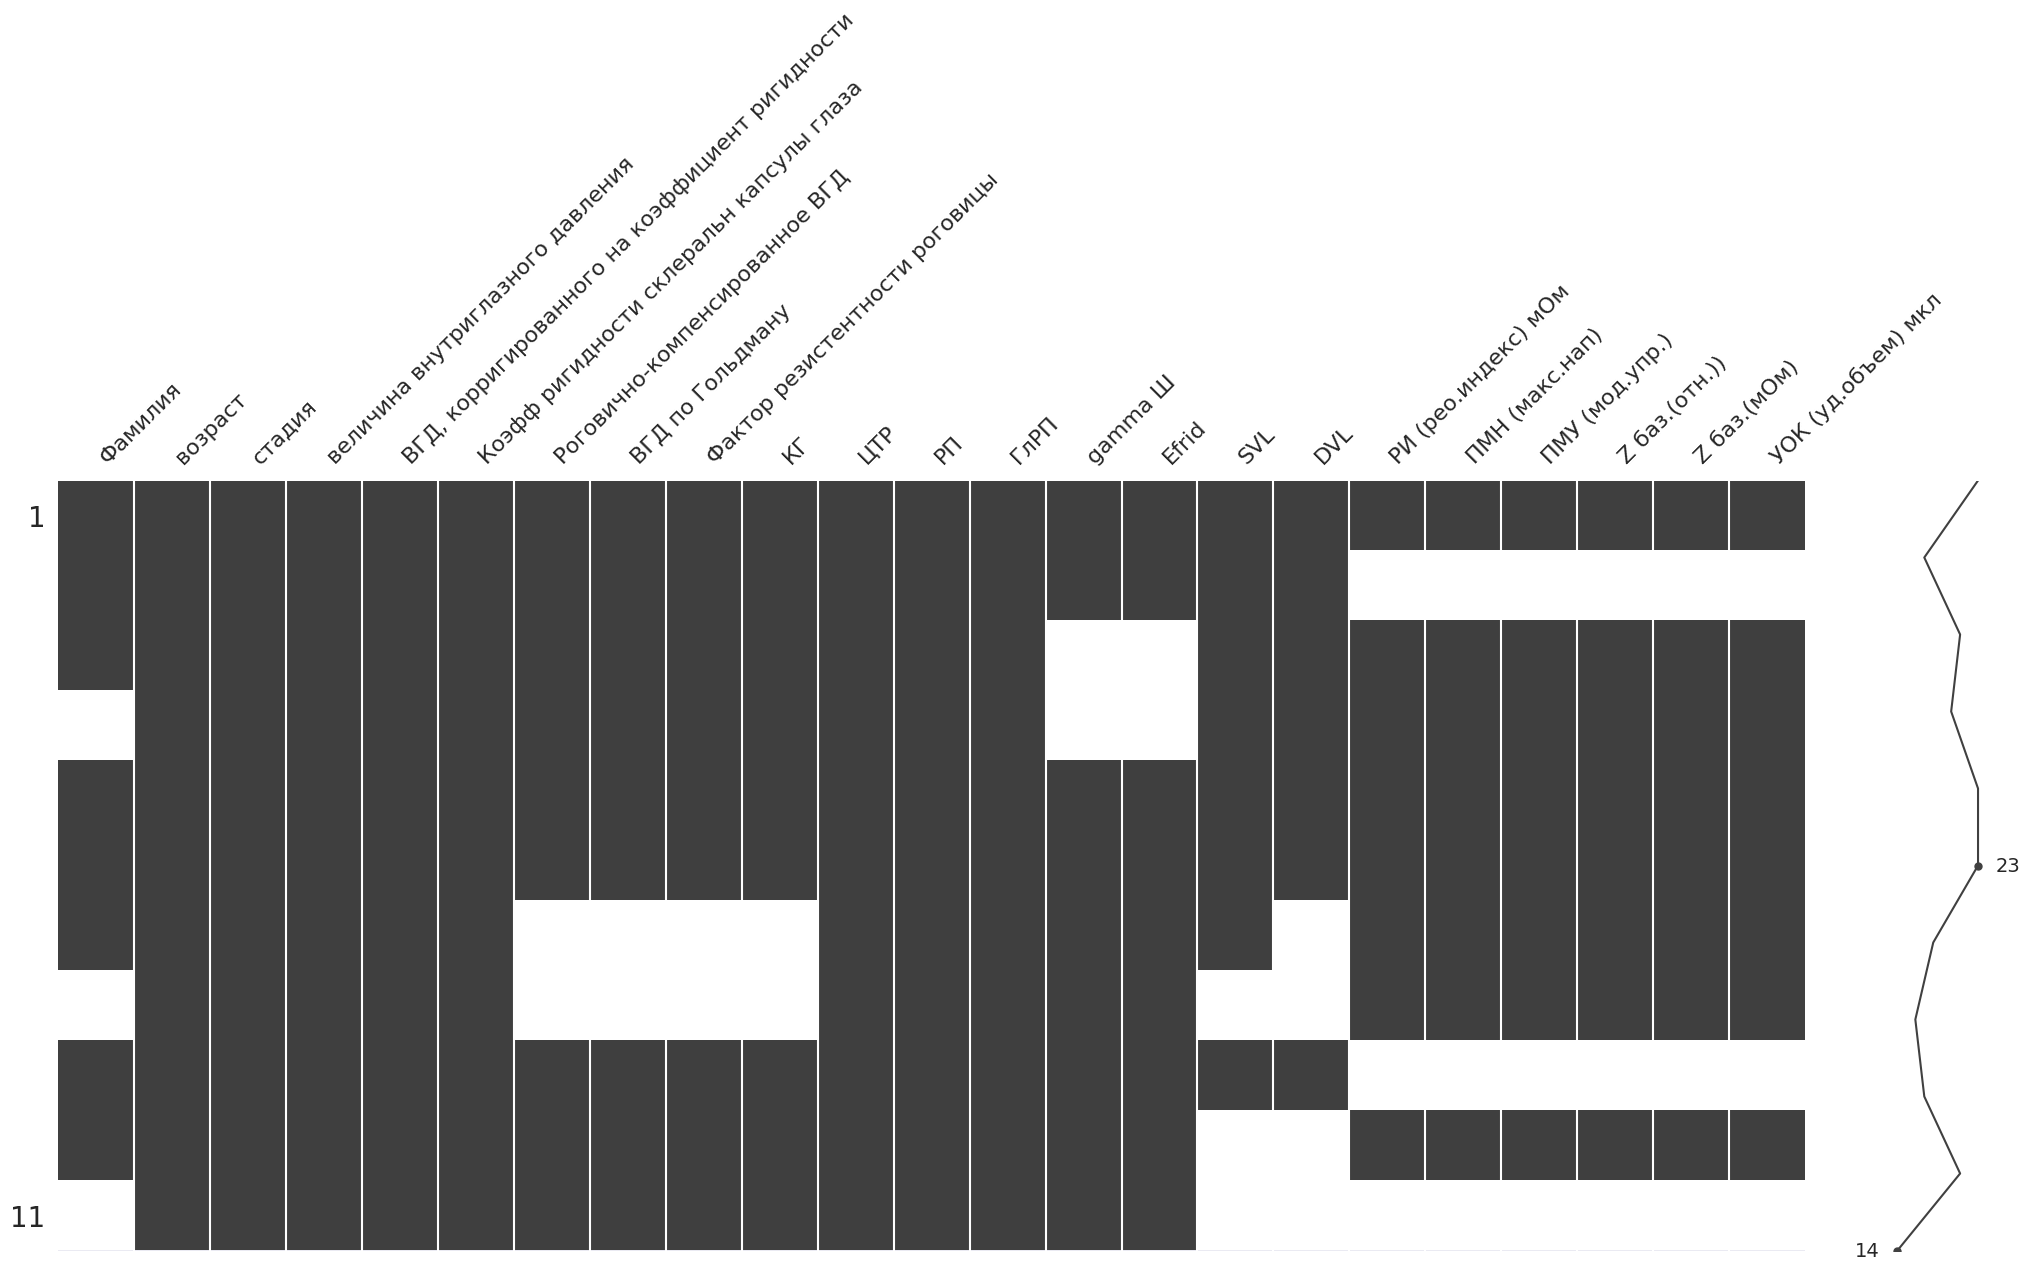

In [28]:
#матрица пропущенных значений
msno.matrix(data_healthy)

Распределение пропущенных значений выглядит случайным внутри столбцов (закономерностью были бы пропуски, например, только в первой половине наблюдений).

Для того чтобы узнать насколько сильно присутствие или отсутствие значений одного признака влияет на присутствие значений другого, построим **матрицу корреляции пропущенных значений (nullity correlation matrix).**

In [29]:
tmp_df = data_healthy.iloc[:, [i for i, n in enumerate(np.var(data_healthy.isnull(), axis = 'rows')) if n > 0]]
tmp_df.isnull().corr()

,Фамилия,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,gamma Ш,Efrid,SVL,DVL,РИ (рео.индекс) мОм,ПМН (макс.нап),ПМУ (мод.упр.),Z баз.(отн.)),Z баз.(мОм),УОК (уд.объем) мкл
Фамилия,1.000000,0.240563,0.240563,0.240563,0.240563,0.240563,0.240563,0.541667,0.385758,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
Роговично-компенсированное ВГД,0.240563,1.000000,1.000000,1.000000,1.000000,-0.222222,-0.222222,0.240563,0.623610,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675
ВГД по Гольдману,0.240563,1.000000,1.000000,1.000000,1.000000,-0.222222,-0.222222,0.240563,0.623610,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675
Фактор резистентности роговицы,0.240563,1.000000,1.000000,1.000000,1.000000,-0.222222,-0.222222,0.240563,0.623610,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675
КГ,0.240563,1.000000,1.000000,1.000000,1.000000,-0.222222,-0.222222,0.240563,0.623610,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675
gamma Ш,0.240563,-0.222222,-0.222222,-0.222222,-0.222222,1.000000,1.000000,-0.288675,-0.356348,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675
Efrid,0.240563,-0.222222,-0.222222,-0.222222,-0.222222,1.000000,1.000000,-0.288675,-0.356348,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675
SVL,0.541667,0.240563,0.240563,0.240563,0.240563,-0.288675,-0.288675,1.000000,0.810093,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
DVL,0.385758,0.623610,0.623610,0.623610,0.623610,-0.356348,-0.356348,0.810093,1.000000,-0.038576,-0.038576,-0.038576,-0.038576,-0.038576,-0.038576
РИ (рео.индекс) мОм,0.083333,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,-0.288675,0.083333,-0.038576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Значения корреляции могут быть от −1 (если значения одного признака присутствуют, значения другого — отсутствуют) до 1 (если присутствуют значения одного признака, то присутствуют значения и другого).

Визуально, корреляцию пропущенных значений можно представить с помощью тепловой карты (heatmap). Для этого есть функция msno.heatmap().

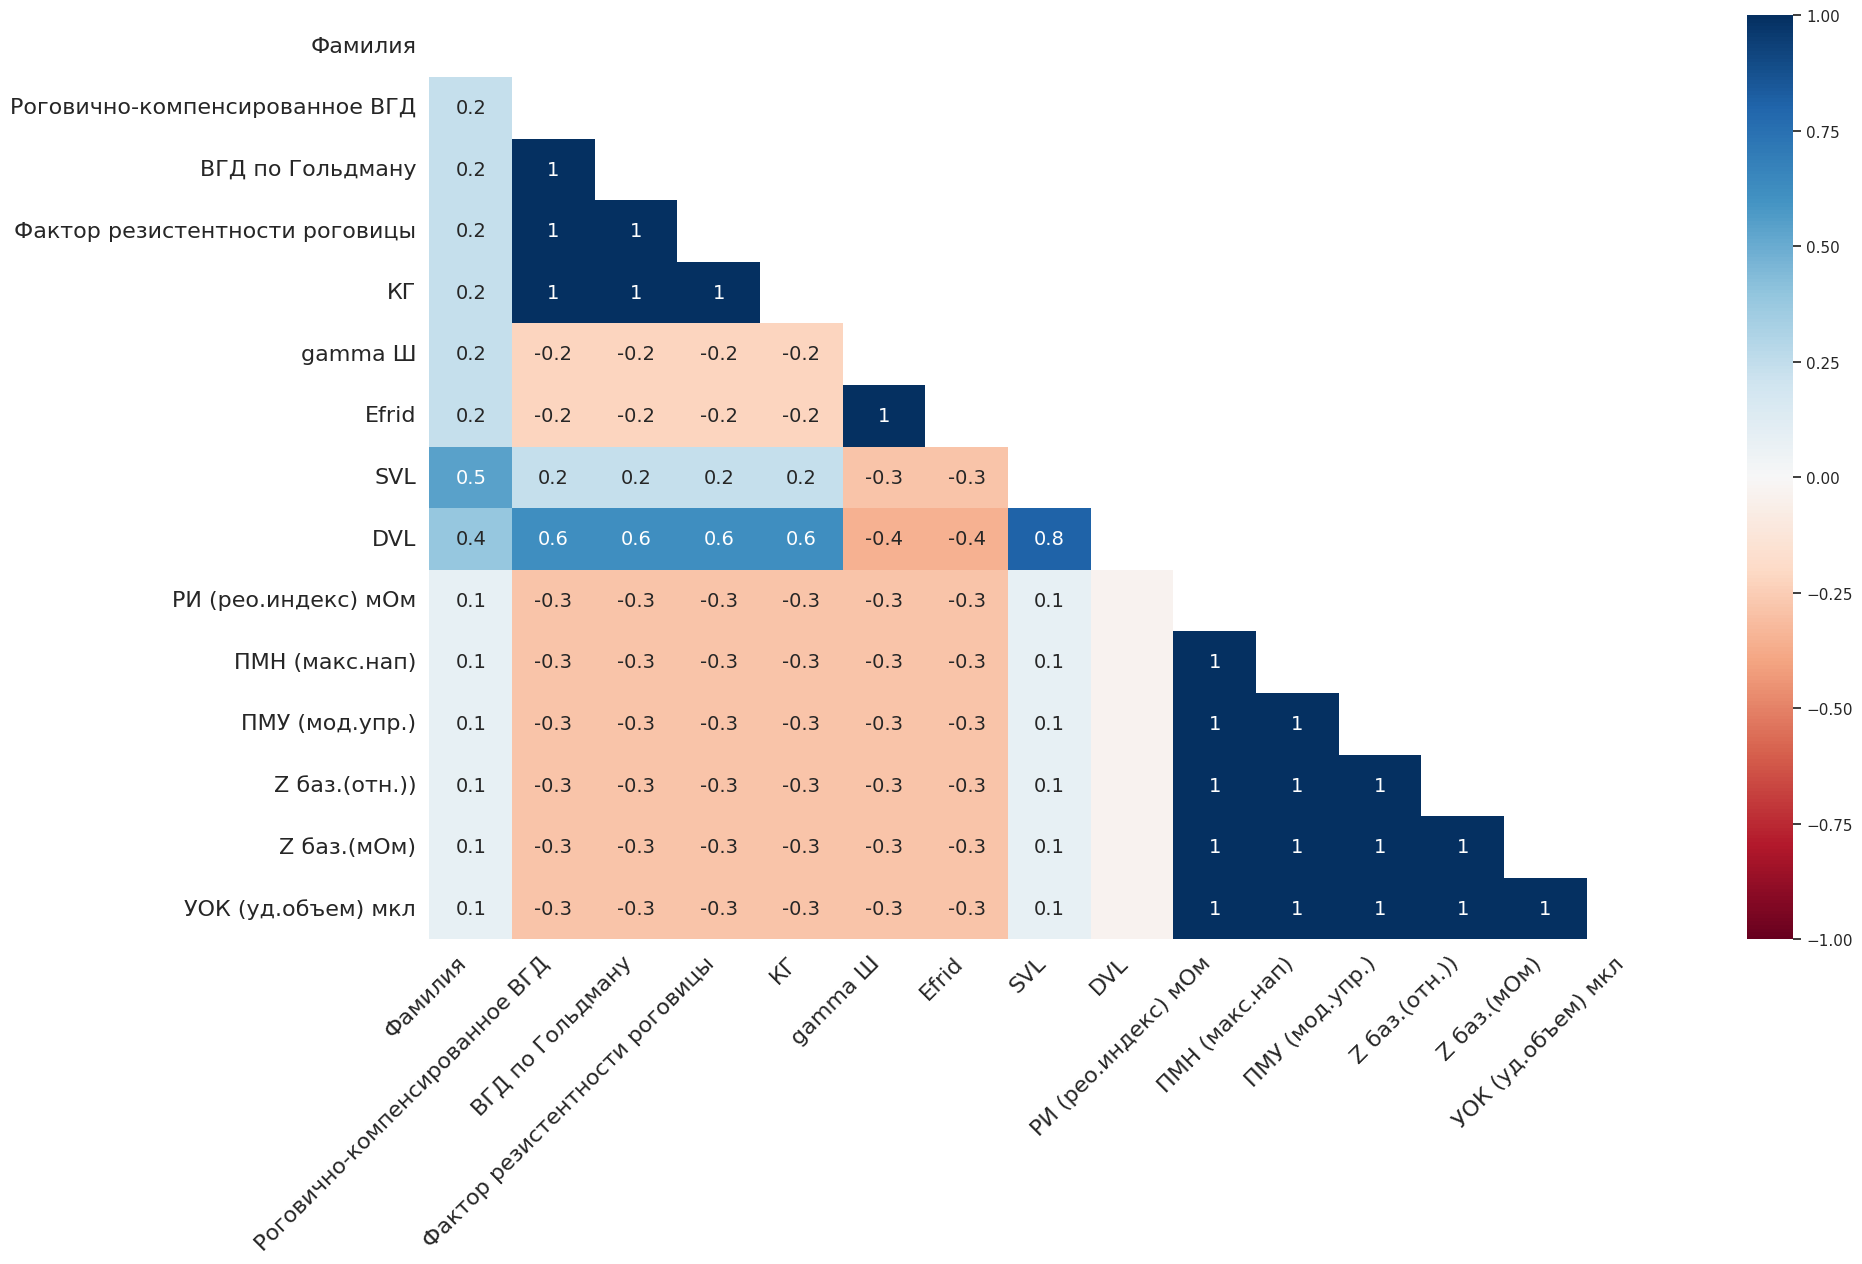

In [30]:
msno.heatmap(data_healthy);

Заметим, что несколько пропущенных признаков имеют **коэффициен корреляции 1.** Получается, что пропуски одного признака влияют на пропуски другого.

Между собой связаны пропуски по следующим признакам:


*   ВГД по Гольдману и Роговично-компенсированное ВГД
*   Фактор резистентности роговицы и Роговично-компенсированное ВГД
*   Фактор резистентности роговицы и ВГД по Гольдману
*   КГ и Роговично-компенсированное ВГД
*   КГ и ВГД по Гольдману
*   КГ и Фактор резистентности роговицы
*   Efrid и gamma Ш
*   ПМН (макс.нап) и РИ (рео.индекс) мОм
*   ПМУ (мод.упр.) и РИ (рео.индекс) мОм
*   ПМУ (мод.упр.) и ПМН (макс.нап)
*   Z баз.(отн.) и РИ (рео.индекс) мОм  
*   Z баз.(отн.) и ПМН (макс.нап)
*   Z баз.(отн.) и ПМУ (мод.упр.)
*   Z баз.(мОм) и РИ (рео.индекс) мОм
*   Z баз.(мОм) и ПМН (макс.нап)
*   Z баз.(мОм) и ПМУ (мод.упр.)
*   Z баз.(мОм) и Z баз.(отн.)
*   УОК (уд.объем) мкл и РИ (рео.индекс) мОм
*   УОК (уд.объем) мкл и ПМН (макс.нап)
*   УОК (уд.объем) мкл и ПМУ (мод.упр.)
*   УОК (уд.объем) мкл и Z баз.(отн.)
*   УОК (уд.объем) мкл и Z баз.(мОм)

### Заполняем пропуски в категориальных признаках



---
Фамилия - категориальный признак. Заполним значением по умолчанию, например,
"Иванов"

In [31]:
data_healthy['Фамилия']=data_healthy['Фамилия'].fillna('Иванов')
data_healthy.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     2
ВГД по Гольдману                                   2
Фактор резистентности роговицы                     2
КГ                                                 2
ЦТР                                                0
РП                                                 0
ГлРП                                               0
gamma Ш                                            2
Efrid                                              2
SVL                                                3
DVL                                                4
РИ (рео.индекс) мОм                                3
ПМН (макс.нап)                                

### Заполняем пропуски в количественных признаках

---

Остальные пропущенные значения принадлежат количественным признакам.

Можно заменить средним значением, модой или медианой.

У такого подхода есть ряд недостатков.

Во-первых, когда в данных появляется большое количество одинаковых близких к среднему значений, мы снижаем ценную вариативность в данных.

Во-вторых, такое заполнение пропусков может быть некорректно.


### Роговично-компенсированное ВГД

In [32]:
# сделаем копию данных
fillna_median = data_healthy.copy()

# заполним пропуски в столбце 'Роговично-компенсированное ВГД' медианным значением признака,
# можно заполнить и средним арифметическим через метод .mean()
fillna_median['Роговично-компенсированное ВГД'].fillna(fillna_median['Роговично-компенсированное ВГД'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['Роговично-компенсированное ВГД'].isna().sum()

0

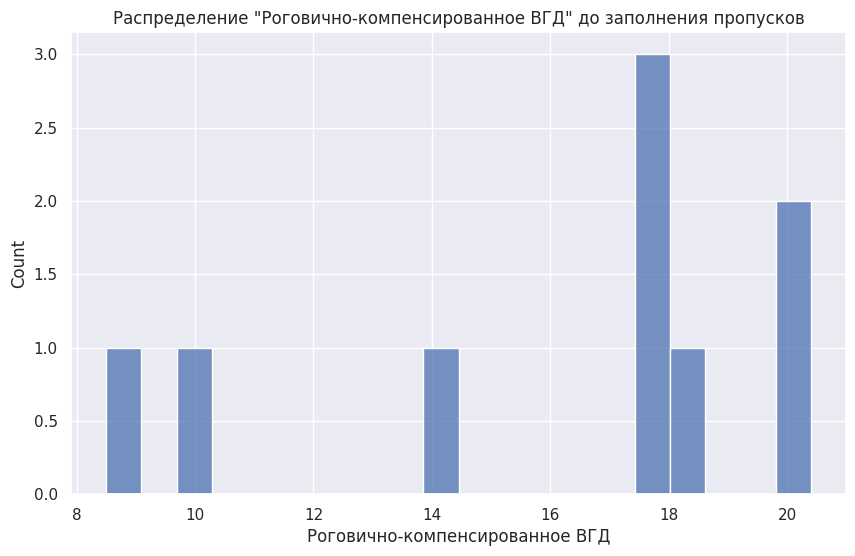

In [33]:
# изменим размер последующих графиков
sns.set(rc = {'figure.figsize' : (10, 6)})

# скопируем датафрейм
median_imputer = data_healthy.copy()

# посмотрим на распределение 'Роговично-компенсированное ВГД' до заполнения пропусков
sns.histplot(median_imputer['Роговично-компенсированное ВГД'], bins = 20)
plt.title('Распределение "Роговично-компенсированное ВГД" до заполнения пропусков');

In [34]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['Роговично-компенсированное ВГД'].mean().round(1), median_imputer['Роговично-компенсированное ВГД'].median()


(16.1, 17.8)

In [35]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Роговично-компенсированное ВГД'] = imp_median.fit_transform(median_imputer[['Роговично-компенсированное ВГД']])

# убедимся, что пропущенных значений не осталось
median_imputer['Роговично-компенсированное ВГД'].isna().sum()

0

Посмотрим на распределение возраста и его медианное значение после заполнения пропусков.

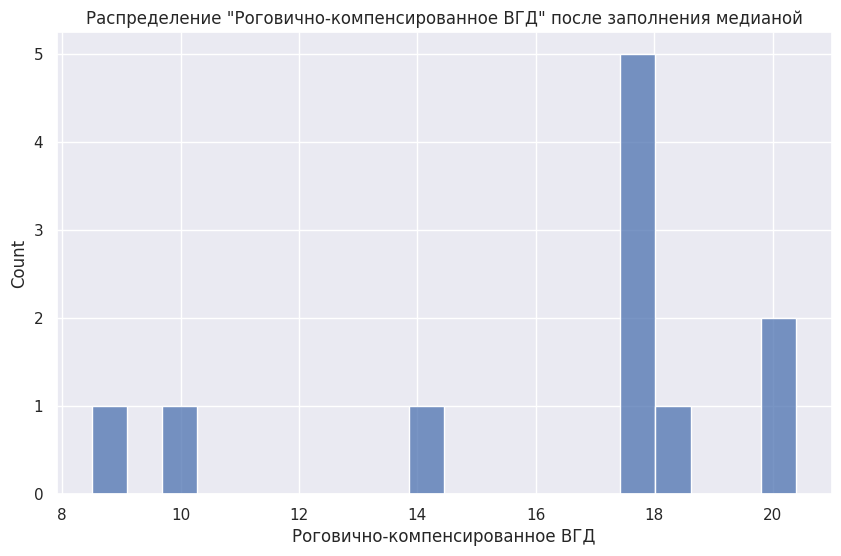

In [36]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['Роговично-компенсированное ВГД'], bins = 20)
plt.title('Распределение "Роговично-компенсированное ВГД" после заполнения медианой');

In [37]:
# посмотрим на метрики после заполнения медианой
median_imputer['Роговично-компенсированное ВГД'].mean().round(1), median_imputer['Роговично-компенсированное ВГД'].median()


(16.4, 17.8)

Среднее значение изменилось(увеличилось на 0.3), медиана осталось прежней.

По графикам заметим, что распределение не потерпело существенных изменений. Значит можем заполнить пропуски по этой стратегии.

---



Аналогично попробуем заполнить и другие пропуски медианнным значением.

### ВГД по Гольдману

In [38]:
# заполним пропуски в столбце 'ВГД по Гольдману' медианным значением признака
fillna_median['ВГД по Гольдману'].fillna(fillna_median['ВГД по Гольдману'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['ВГД по Гольдману'].isna().sum()

0

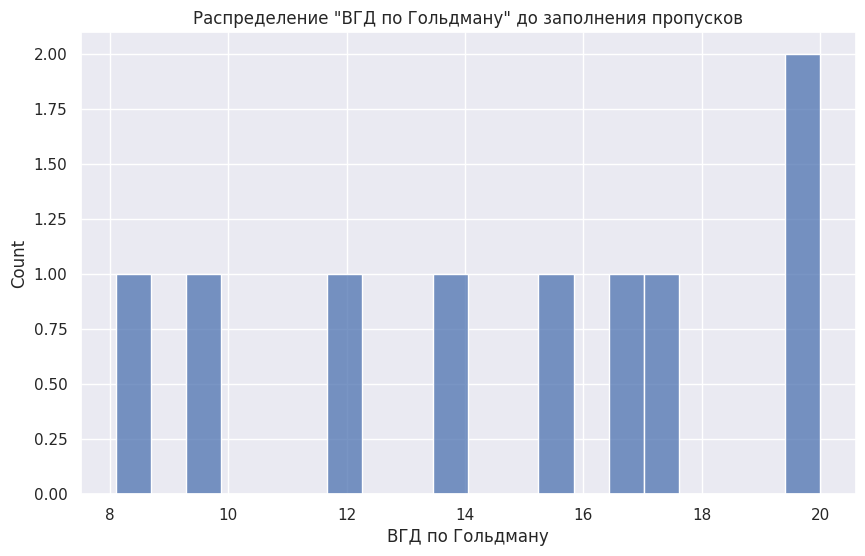

In [39]:
# посмотрим на распределение 'ВГД по Гольдману' до заполнения пропусков
sns.histplot(data_healthy['ВГД по Гольдману'], bins = 20)
plt.title('Распределение "ВГД по Гольдману" до заполнения пропусков');

In [40]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['ВГД по Гольдману'].mean().round(1), median_imputer['ВГД по Гольдману'].median()


(14.7, 15.6)

In [41]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['ВГД по Гольдману'] = imp_median.fit_transform(median_imputer[['ВГД по Гольдману']])

# убедимся, что пропущенных значений не осталось
median_imputer['ВГД по Гольдману'].isna().sum()

0

Посмотрим на распределение возраста и его медианное значение после заполнения пропусков.

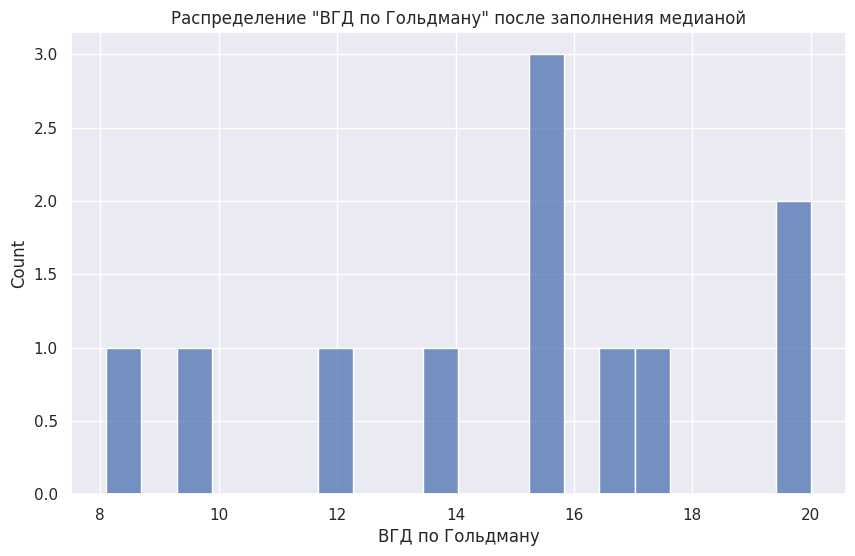

In [42]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['ВГД по Гольдману'], bins = 20)
plt.title('Распределение "ВГД по Гольдману" после заполнения медианой');

In [43]:
# посмотрим на метрики после заполнения медианой
median_imputer['ВГД по Гольдману'].mean().round(1), median_imputer['ВГД по Гольдману'].median()


(14.9, 15.6)

Среднее значение изменилось(увеличилось на 0.2), медиана осталось прежней.

График распределения визуально **изменился**.

### Фактор резистентности роговицы

In [44]:
# заполним пропуски в столбце 'Фактор резистентности роговицы' медианным значением признака
fillna_median['Фактор резистентности роговицы'].fillna(fillna_median['Фактор резистентности роговицы'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['Фактор резистентности роговицы'].isna().sum()

0

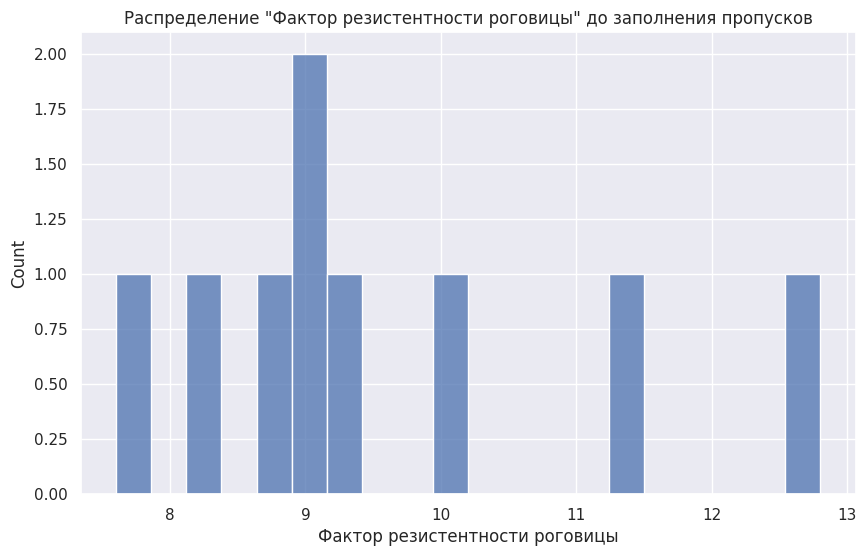

In [45]:
# посмотрим на распределение 'Фактор резистентности роговицы' до заполнения пропусков
sns.histplot(data_healthy['Фактор резистентности роговицы'], bins = 20)
plt.title('Распределение "Фактор резистентности роговицы" до заполнения пропусков');

In [46]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['Фактор резистентности роговицы'].mean().round(1), median_imputer['Фактор резистентности роговицы'].median()


(9.6, 9.1)

In [47]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Фактор резистентности роговицы'] = imp_median.fit_transform(median_imputer[['Фактор резистентности роговицы']])

# убедимся, что пропущенных значений не осталось
median_imputer['Фактор резистентности роговицы'].isna().sum()

0

Посмотрим на распределение возраста и его медианное значение после заполнения пропусков.

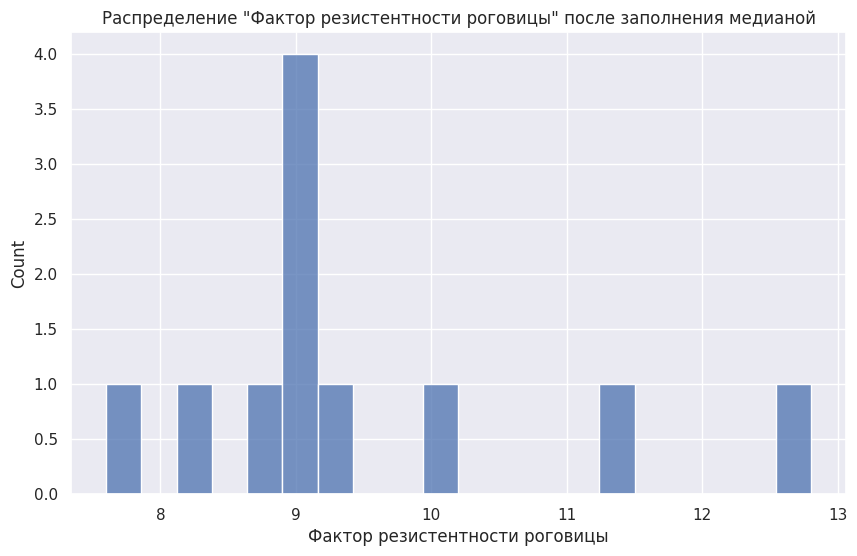

In [48]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['Фактор резистентности роговицы'], bins = 20)
plt.title('Распределение "Фактор резистентности роговицы" после заполнения медианой');

In [49]:
# посмотрим на метрики после заполнения медианой
median_imputer['Фактор резистентности роговицы'].mean().round(1), median_imputer['Фактор резистентности роговицы'].median()


(9.5, 9.1)

Среднее значение изменилось(увеличилось на 0.1), медиана осталось прежней.

График распределения визуально **незначительно изменился**, форма осталась прежней.



### КГ

In [50]:
# заполним пропуски в столбце 'КГ' медианным значением признака
fillna_median['КГ'].fillna(fillna_median['КГ'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['КГ'].isna().sum()

0

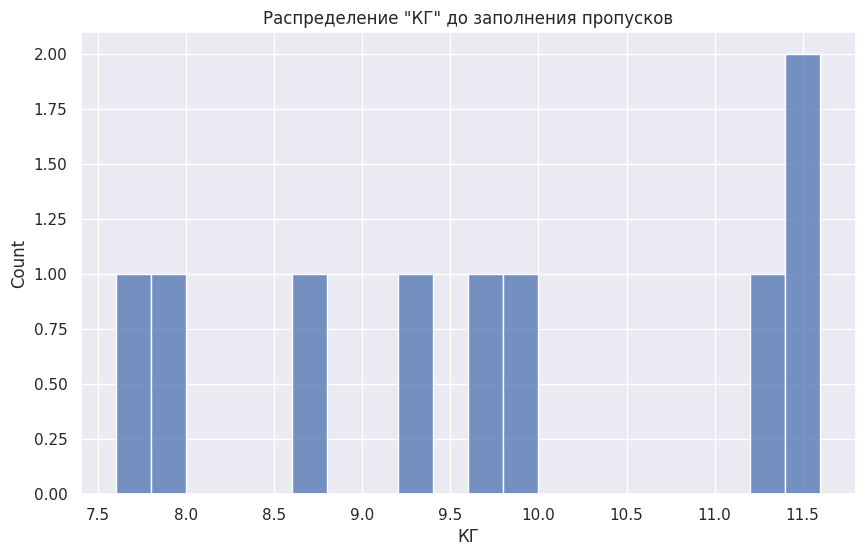

In [51]:
# посмотрим на распределение 'КГ' до заполнения пропусков
sns.histplot(data_healthy['КГ'], bins = 20)
plt.title('Распределение "КГ" до заполнения пропусков');

In [52]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['КГ'].mean().round(1), median_imputer['КГ'].median()


(9.7, 9.6)

In [53]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['КГ'] = imp_median.fit_transform(median_imputer[['КГ']])

# убедимся, что пропущенных значений не осталось
median_imputer['КГ'].isna().sum()

0

Посмотрим на распределение возраста и его медианное значение после заполнения пропусков.

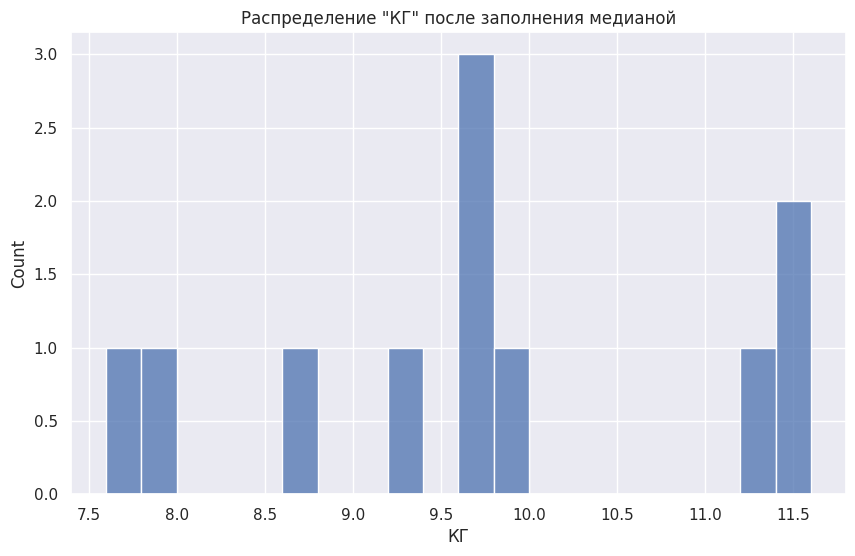

In [54]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['КГ'], bins = 20)
plt.title('Распределение "КГ" после заполнения медианой');

In [55]:
# посмотрим на метрики после заполнения медианой
median_imputer['КГ'].mean().round(1), median_imputer['КГ'].median()


(9.7, 9.6)

Среднее значение и медиана не изменились.

График распределения визуально **изменился**.

### gamma Ш

In [56]:
# заполним пропуски в столбце 'gamma Ш' медианным значением признака
fillna_median['gamma Ш'].fillna(fillna_median['gamma Ш'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['gamma Ш'].isna().sum()

0

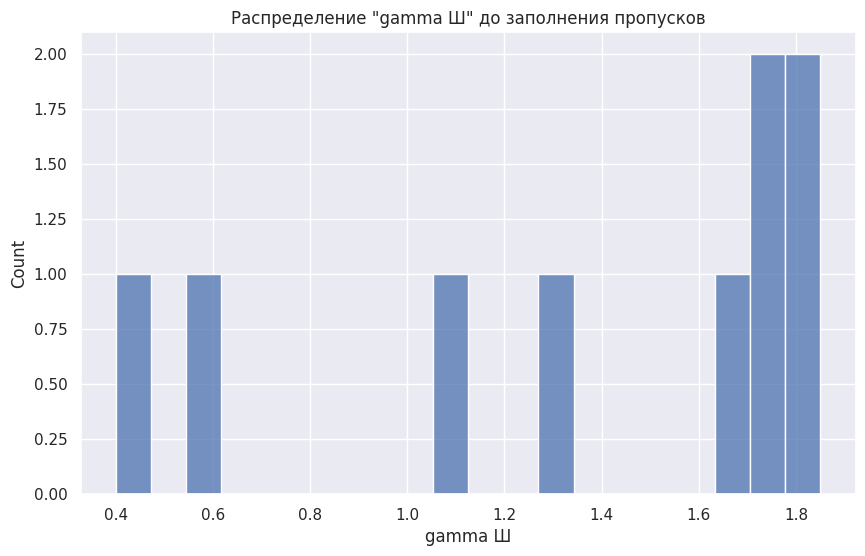

In [57]:
# посмотрим на распределение 'gamma Ш' до заполнения пропусков
sns.histplot(data_healthy['gamma Ш'], bins = 20)
plt.title('Распределение "gamma Ш" до заполнения пропусков');

In [58]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['gamma Ш'].mean().round(1), median_imputer['gamma Ш'].median()


(1.4, 1.7)

In [59]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['gamma Ш'] = imp_median.fit_transform(median_imputer[['gamma Ш']])

# убедимся, что пропущенных значений не осталось
median_imputer['gamma Ш'].isna().sum()

0

Посмотрим на распределение возраста и его медианное значение после заполнения пропусков.

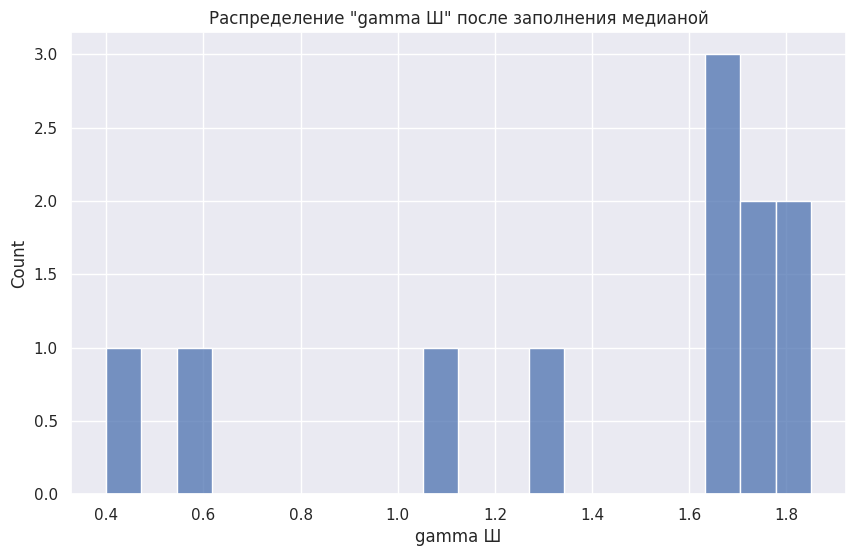

In [60]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['gamma Ш'], bins = 20)
plt.title('Распределение "gamma Ш" после заполнения медианой');

In [61]:
# посмотрим на метрики после заполнения медианой
median_imputer['gamma Ш'].mean().round(1), median_imputer['gamma Ш'].median()


(1.4, 1.7)

Среднее значение и медиана не изменились.

График распределения визуально **изменился**.

Остальные пропуски также заполним медианным значением

### Остальные пропуски

In [62]:
#Посмотрим на среднее арифметическое и медиану.
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())


Efrid -  0.0    0.0138
SVL -  52.4    52.44
DVL -  45.9    45.88
РИ (рео.индекс) мОм -  69.2    51.555
ПМН (макс.нап) -  0.3    0.28
ПМУ (мод.упр.) -  0.3    0.275
Z баз.(отн.)) -  960.8    948.0
Z баз.(мОм) -  38.4    37.92
УОК (уд.объем) мкл -  1.5    1.2528672301593047


In [63]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Efrid'] = imp_median.fit_transform(median_imputer[['Efrid']])
median_imputer['SVL'] = imp_median.fit_transform(median_imputer[['SVL']])
median_imputer['DVL'] = imp_median.fit_transform(median_imputer[['DVL']])
median_imputer['РИ (рео.индекс) мОм'] = imp_median.fit_transform(median_imputer[['РИ (рео.индекс) мОм']])
median_imputer['ПМН (макс.нап)'] = imp_median.fit_transform(median_imputer[['ПМН (макс.нап)']])
median_imputer['ПМУ (мод.упр.)'] = imp_median.fit_transform(median_imputer[['ПМУ (мод.упр.)']])
median_imputer['Z баз.(отн.))'] = imp_median.fit_transform(median_imputer[['Z баз.(отн.))']])
median_imputer['Z баз.(мОм)'] = imp_median.fit_transform(median_imputer[['Z баз.(мОм)']])
median_imputer['УОК (уд.объем) мкл'] = imp_median.fit_transform(median_imputer[['УОК (уд.объем) мкл']])

# убедимся, что пропущенных значений не осталось
median_imputer['УОК (уд.объем) мкл'].isna().sum()

0

In [64]:
# посмотрим на метрики после заполнения медианой
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())


Efrid -  0.0    0.0138
SVL -  52.4    52.44
DVL -  45.9    45.88
РИ (рео.индекс) мОм -  64.4    51.555
ПМН (макс.нап) -  0.3    0.28
ПМУ (мод.упр.) -  0.3    0.275
Z баз.(отн.)) -  957.3    948.0
Z баз.(мОм) -  38.3    37.92
УОК (уд.объем) мкл -  1.5    1.2528672301593047


Среднее значение и медиана не изменились для признаков Efrid, SVL, DVL, ПМН(макс.нап), ПМН(мод.упр.), УОК (уд.объем) мкл.

Заметно изменение среднего значения РИ (рео.индекс) мОм, Z баз.(отн.) и Z баз.(мОм).

Проверяем, что заполнили все пропуски.

In [65]:
median_imputer.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     0
ВГД по Гольдману                                   0
Фактор резистентности роговицы                     0
КГ                                                 0
ЦТР                                                0
РП                                                 0
ГлРП                                               0
gamma Ш                                            0
Efrid                                              0
SVL                                                0
DVL                                                0
РИ (рео.индекс) мОм                                0
ПМН (макс.нап)                                

## Сравниваем взаимосвязь признаков до и после заполнения пропусков

In [66]:
corr_matrix_before=data_healthy.iloc [:, 1:11].corr().round(3)

<Axes: >

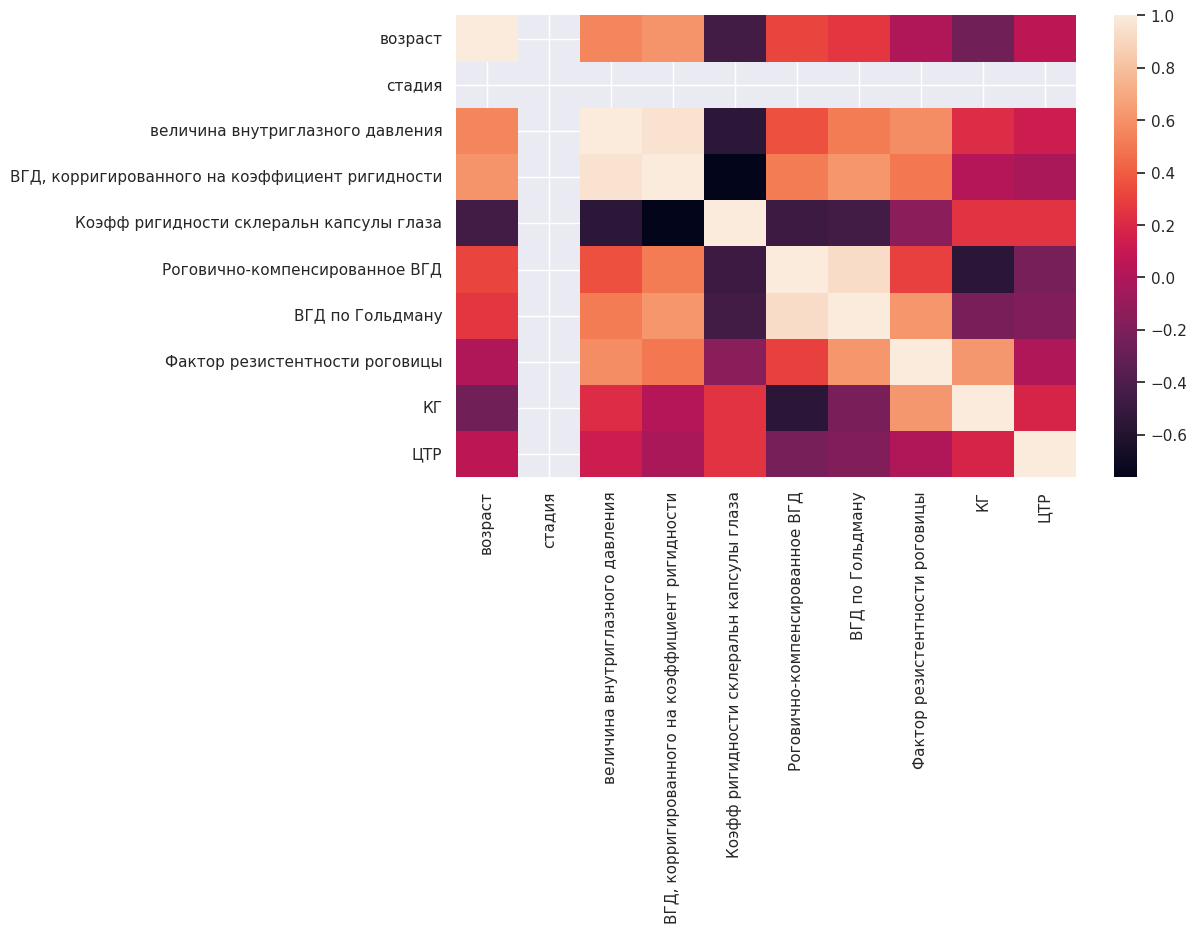

In [67]:
sns.heatmap(corr_matrix_before)

In [68]:
corr_matrix_after=median_imputer.iloc [:, 1:11].corr().round(3)

<Axes: >

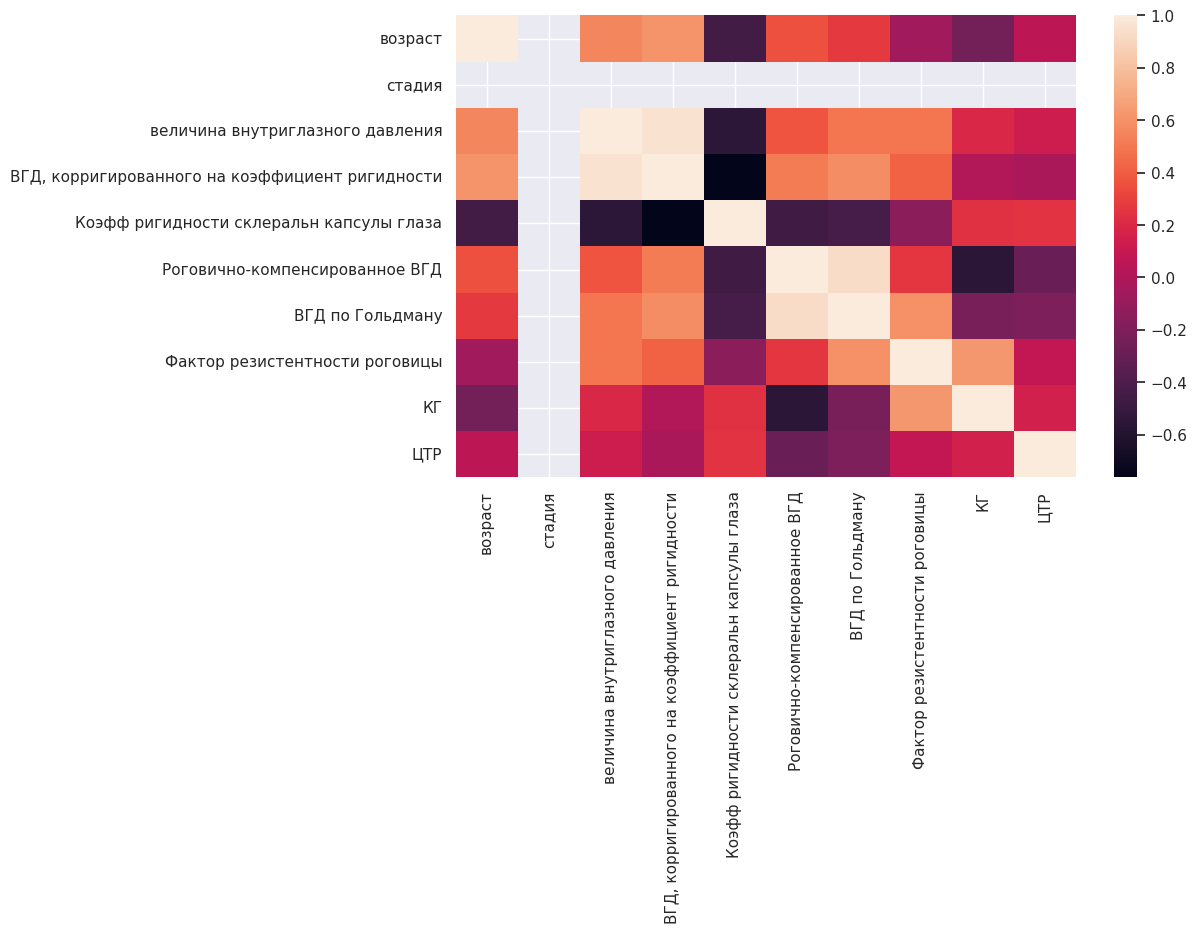

In [69]:
sns.heatmap(corr_matrix_after)

Визуально взаимосвязь дополненных показателей с другими не изменилась.

In [70]:
changes_in_corr=corr_matrix_before-corr_matrix_after

In [71]:
changes_in_corr

,возраст,стадия,величина внутриглазного давления,"ВГД, корригированного на коэффициент ригидности",Коэфф ригидности склеральн капсулы глаза,Роговично-компенсированное ВГД,ВГД по Гольдману,Фактор резистентности роговицы,КГ,ЦТР
возраст,0.000,NaN,0.000,0.000,0.000,-0.041,-0.011,0.061,-0.019,0.000
стадия,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
величина внутриглазного давления,0.000,NaN,0.000,0.000,0.000,-0.016,0.017,0.088,0.024,0.000
"ВГД, корригированного на коэффициент ригидности",0.000,NaN,0.000,0.000,0.000,0.005,0.031,0.082,0.008,0.000
Коэфф ригидности склеральн капсулы глаза,0.000,NaN,0.000,0.000,0.000,-0.012,-0.011,-0.012,0.006,0.000
Роговично-компенсированное ВГД,-0.041,NaN,-0.016,0.005,-0.012,0.000,0.002,0.030,-0.005,0.055
ВГД по Гольдману,-0.011,NaN,0.017,0.031,-0.011,0.002,0.000,0.020,0.001,0.014
Фактор резистентности роговицы,0.061,NaN,0.088,0.082,-0.012,0.030,0.020,0.000,0.002,-0.082
КГ,-0.019,NaN,0.024,0.008,0.006,-0.005,0.001,0.002,0.000,0.026
ЦТР,0.000,NaN,0.000,0.000,0.000,0.055,0.014,-0.082,0.026,0.000


Изменения произошли, но они достаточно малы.

<Axes: >

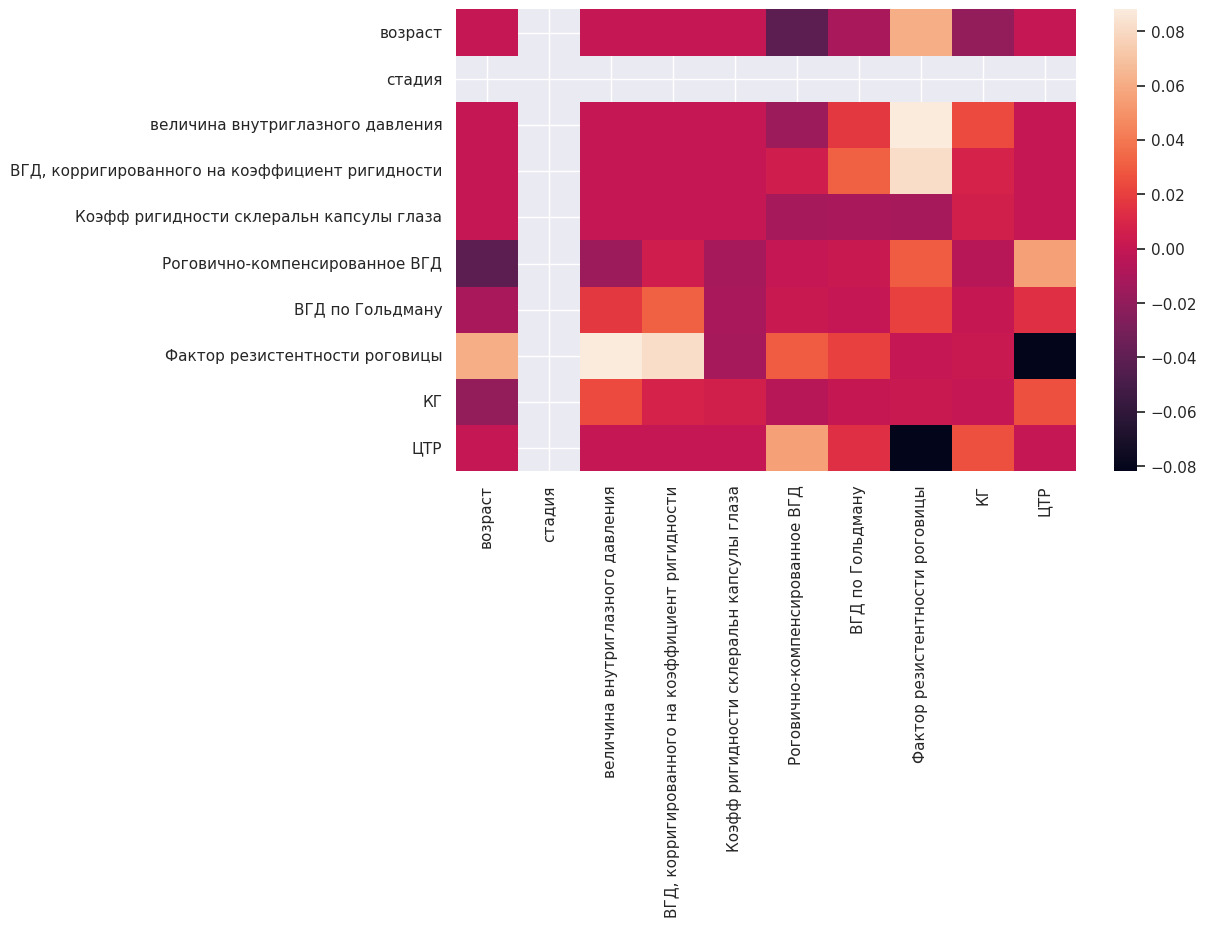

In [72]:
sns.heatmap(changes_in_corr)

Аналогично будут обработаны табллицы для 1й, 2й и 3й стадий заболевания.